In [29]:
import os
import pandas as pd
from ase.io import read
import matplotlib.pyplot as plt

In [2]:
path = 'zirconium-dioxide/results/emissions/'
models = os.listdir(path)

In [31]:
count = 0
strucs = os.listdir('zirconium-dioxide/dataset_zro2')

for struc in strucs:
    total = read(f'zirconium-dioxide/dataset_zro2/{struc}',index=':')
    for s in struc: count += len(struc)

In [78]:
float(list(df['duration'].values)[0] * 60/count)

2.3119515588331456

In [76]:
df

,timestamp,project_name,run_id,experiment_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,...,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
0,2025-05-01T21:00:57,codecarbon,60e5b9f4-9ef3-40bf-b7a3-566a63a73fb7,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,378.890328,0.002833,0.000007,77.5,84.63437,94.210234,...,4,AMD EPYC 7452 32-Core Processor,1,1 x NVIDIA L40,-43.2192,-22.8305,251.227291,machine,N,1.0


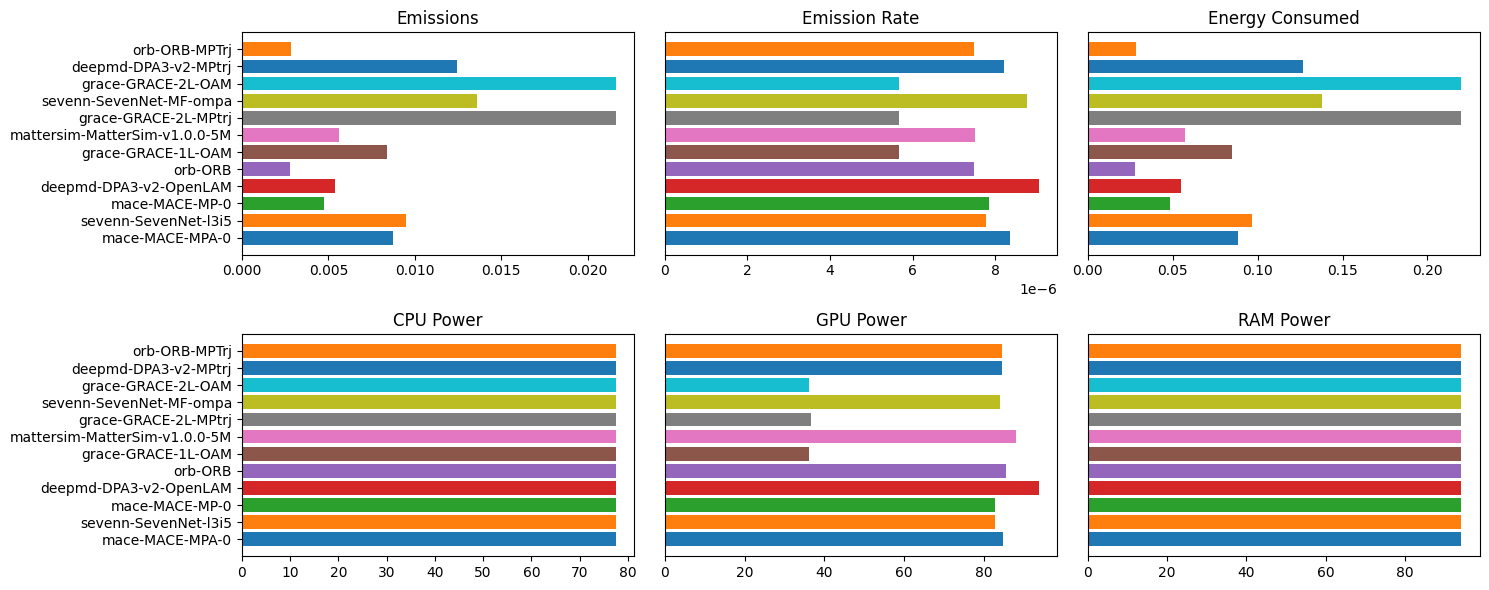

In [75]:
emissions_models = {}
plt.figure(figsize=(15, 6))

for model in models:

    df = pd.read_csv(path + model)

    emissions_models[model[:-4]] = [
        float(list(df['duration'].values)[0] * 60/count),
        float(list(df['emissions'].values)[0]),
        float(list(df['energy_consumed'].values)[0]),
        float(list(df['gpu_power'].values)[0])
    ]

    plt.subplot(231)
    plt.title('Emissions')
    plt.barh(model[:-4], df['emissions'])
    
    plt.subplot(232)
    plt.title('Emission Rate')
    plt.barh(model[:-4], df['emissions_rate'])
    plt.yticks([])

    plt.subplot(233)
    plt.title('Energy Consumed')
    plt.barh(model[:-4], df['energy_consumed'])
    plt.yticks([])

    plt.subplot(234)
    plt.title('CPU Power')
    plt.barh(model[:-4], df['cpu_power'])
    
    plt.subplot(235)
    plt.title('GPU Power')
    plt.barh(model[:-4], df['gpu_power'])
    plt.yticks([])

    plt.subplot(236)
    plt.title('RAM Power')
    plt.barh(model[:-4], df['ram_power'])
    plt.yticks([])

plt.tight_layout()
plt.show()

In [72]:
df = pd.DataFrame(emissions_models).T
df.columns = ['Atoms/Second', 'Emissions (gCO2eq)', 'Energy (kWh)', 'GPU Power (W)']

In [69]:
df['Atoms/Second'][0]

/var/folders/zw/zz64dmqx4ws9zzbg59qs_1t40000gn/T/ipykernel_47636/3112974159.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['Atoms/Second'][0]


np.float64(6.3661946436632935)

In [83]:
path

'/Users/pedrozanineli/Projects/inference/experiments/zirconium-dioxide/results/emissions/'

In [84]:
emissions_models = {}

path = '/Users/pedrozanineli/Projects/inference/experiments/zirconium-dioxide/results/emissions/'
models = os.listdir(path)

for model in models:

    em = pd.read_csv(f'{path}/{model}')

    emissions_models[model[:-4]] = [
        float(list(em['duration'].values)[0] * 60/count),
        float(list(em['emissions'].values)[0]),
        float(list(em['energy_consumed'].values)[0]),
        float(list(em['gpu_power'].values)[0])
    ]

In [86]:
model

'orb-ORB-MPTrj.csv'